In [1]:
# Author: Xianhui
#

from __future__ import print_function
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.optimizers import SGD, Adam
from keras.losses import categorical_crossentropy, binary_crossentropy
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

C:\Users\cyret\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


## keras regression 

In [3]:
from sklearn.datasets import load_boston
_ = load_boston()
X2, y2 = _.data, _.target
cols = _.feature_names
# response = _.
print(_.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
cols, X2.shape, X2[:5], y2[:5]

(array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7'),
 (506, 13),
 array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
         6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
         1.5300e+01, 3.9690e+02, 4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
         6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
         1.7800e+01, 3.9690e+02, 9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
         7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
         1.7800e+01, 3.9283e+02, 4.0300e+00],
        [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
         6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
         1.8700e+01, 3.9463e+02, 2.9400e+00],
        [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
         7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.33, random_state=42)

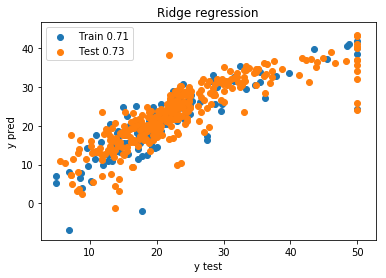

In [15]:
from sklearn.linear_model import Ridge
lr = Ridge(alpha=10.0)
lr.fit(X_train, y_train)
# print(lr.score(X_train, y_train), lr.score(X_test, y_test))
plt.scatter(y_test, lr.predict(X_test))
plt.scatter(y_train, lr.predict(X_train))
plt.title('Ridge regression')
plt.xlabel('y test')
plt.ylabel('y pred')
plt.legend([f'Train {lr.score(X_test, y_test).round(2)}', f'Test {lr.score(X_train, y_train).round(2)}'])
plt.show()

## The keras neural network gave better model than Ridge model

In [7]:
def base_model_regression(input_dim=13, num_classes=1):
    '''
    regression model with 1 output, use mse as loss function
    '''
    model = Sequential()
    model.add(Dense(units=32, input_dim=input_dim))
    model.add(Activation('relu'))
    model.add(Dense(units=16))
    model.add(Activation('relu'))
    model.add(Dense(num_classes, activation='linear'))  # 3 units for 3 classes
    adam = Adam(lr=0.001)
    model.compile(optimizer=adam, loss='mse', metrics=['mse'])
    return model
lr_keras = base_model_regression()
lr_keras.fit(X_train, y_train, epochs=1500)

Epoch 1/1500
339/339 [==============================] - 0s 974us/step - loss: 43015.6170 - mean_squared_error: 43015.6170
Epoch 2/1500
339/339 [==============================] - 0s 85us/step - loss: 15525.7311 - mean_squared_error: 15525.7311
Epoch 3/1500
339/339 [==============================] - 0s 89us/step - loss: 3946.0450 - mean_squared_error: 3946.0450
Epoch 4/1500
339/339 [==============================] - 0s 75us/step - loss: 1477.8502 - mean_squared_error: 1477.8502
Epoch 5/1500
339/339 [==============================] - 0s 80us/step - loss: 1020.9300 - mean_squared_error: 1020.9300
Epoch 6/1500
339/339 [==============================] - 0s 80us/step - loss: 623.1631 - mean_squared_error: 623.1631
Epoch 7/1500
339/339 [==============================] - 0s 101us/step - loss: 364.4071 - mean_squared_error: 364.4071
Epoch 8/1500
339/339 [==============================] - 0s 75us/step - loss: 265.2597 - mean_squared_error: 265.2597
Epoch 9/1500
339/339 [==========================

In [8]:
from sklearn.metrics import r2_score
print(f'Accuracy score Train: {r2_score(y_train, lr_keras.predict(X_train)).round(3)}')
print(f'Accuracy score Test: {r2_score(y_test, lr_keras.predict(X_test)).round(3)}')

Accuracy score Train: 0.915
Accuracy score Test: 0.833


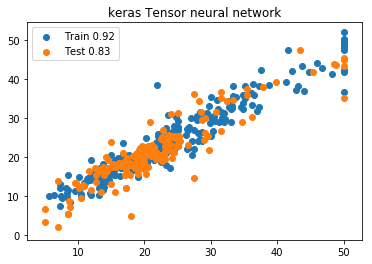

In [9]:
plt.scatter(y_train[:], lr_keras.predict(X_train)[:])
plt.scatter(y_test[:], lr_keras.predict(X_test)[:])
plt.title('keras Tensor neural network')
plt.legend([f'Train {r2_score(y_train, lr_keras.predict(X_train)).round(2)}', f'Test {r2_score(y_test, lr_keras.predict(X_test)).round(2)}'])
plt.show()

## sensivity PDP plot

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence


r2 0.8587260970112164
Convenience plot with ``partial_dependence_plots``
Custom 3d plot via ``partial_dependence``


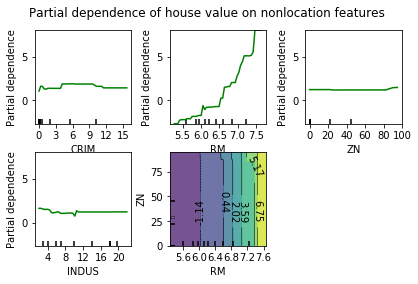

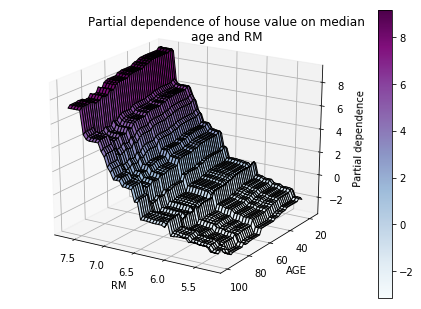

In [14]:
clf = GradientBoostingRegressor(n_estimators=100, max_depth=4,
                                learning_rate=0.1, loss='huber',
                                random_state=1)
clf.fit(X_train, y_train)
print(f'r2 {r2_score(y_test, clf.predict(X_test))}')
print('Convenience plot with ``partial_dependence_plots``')
# clf = lr_keras
names = cols
features = [0, 5, 1, 2, (5, 1)]
fig, axs = plot_partial_dependence(clf, X_train, features,
                                   feature_names=names,
                                   n_jobs=3, grid_resolution=50)
fig.suptitle('Partial dependence of house value on nonlocation features\n')
plt.subplots_adjust(top=0.9)  # tight_layout causes overlap with suptitle

print('Custom 3d plot via ``partial_dependence``')
fig = plt.figure()

target_feature = (5, 6)
pdp, axes = partial_dependence(clf, target_feature,
                               X=X_train, grid_resolution=50)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].reshape(list(map(np.size, axes))).T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                       cmap=plt.cm.BuPu, edgecolor='k')
ax.set_xlabel(names[target_feature[0]])
ax.set_ylabel(names[target_feature[1]])
ax.set_zlabel('Partial dependence')
#  pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.suptitle('Partial dependence of house value on median\n'
             'age and RM')
plt.subplots_adjust(top=0.9)

plt.show()